<a href="https://colab.research.google.com/github/divych1/Play_Store-App_Data_Analysis/blob/main/Divy_Chanchawat_Team_2_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Today in the era of information technology it is quite interesting to move a step ahead , from the world of information technology to the world of machine learning and artificial inteligence. we have started the revolution with help of data science and many new technologies are yet to come. The field of data science has helped us analyse the data and draw out some useful conclusions for a well planned future with lesser risks and better satisfaction/

The thing that has supported the most, to bringout this revolution is our mobile phones play store that have a huge collection of applications through which we carry out all our tasks and transactions.

The applications and their success depends on many factors and we have to analyse on the basis of the data that contains a lot of information on app category, rating, price, type ,version,user reviews  etc.

Let us Start!!





### Importing all required Liberaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating two DataFrames

---


1.   df_play_store

> 
        It is  having data for 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver' related information
2.   df_reviews

> 
        It is  having data for 'App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity' related information







In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/'
file_name_playstore = 'googleplaystore.csv'
file_name_reviews = 'googleplaystore_user_reviews.csv'
df_play_store = pd.read_csv(working_directory + file_name_playstore )
df_reviews = pd.read_csv(working_directory + file_name_reviews )

In [ ]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


### Analysing the First DataFrame

In [ ]:
df_play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

So it has both numerical and categorical data

Let us take some factors which are numerical in nature so that we can have some numerical analysis and draw some conclusion so that we can find out which of them really can be considered a success factor for any App.

In [ ]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.5+ MB


We see that there are many factors to decide ,whether a given App is a successful App or a failure. 

### Lets see which category have most number of apps in the play store

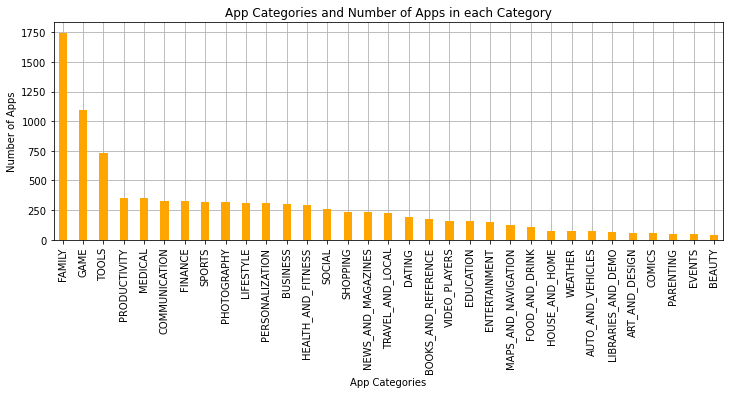

In [ ]:
cate_ = df_play_store['Category'].value_counts().plot(kind='bar',figsize=(12, 4),grid=True,facecolor='orange', zorder=2, width=0.4)
plt.xlabel("App Categories")
plt.ylabel("Number of Apps")
plt.title("App Categories and Number of Apps in each Category")
plt.show(cate_)

So we see that top 3 categories having highest number of apps on play store are FAMILY, GAME and TOOLS

Doing some analysis........Working on factors 

Let us take some factors which are numerical in nature so that we can have some numerical analysis and draw some conclusion so that we can find out which of them really can be considered a success factor for any App.


Taking Ratings ,Number of Reviews and Number of Installs as our first three factors


Let me do some data cleaning ,We see that only Ratings have large null values otherwise there are very less null values so it will not affect our analysis, so no need to remove them, we will consider Ratings later. Also , converting string and object type data to integer or float type for analysis 

In [ ]:
df_play_store.dropna(inplace=True)

In [ ]:
index_of_row_to_del = df_play_store[df_play_store['Reviews']=='3.0M'].index
df_play_store.drop(index_of_row_to_del , inplace=True)

In [ ]:
df_play_store['Reviews'] = df_play_store['Reviews'].astype(str).astype(float)

In [ ]:
df_play_store['Installs'] = df_play_store['Installs'].map(lambda x: x.rstrip("+"))

In [ ]:
df_play_store['Installs']  = df_play_store['Installs'].str.replace(',', "").replace('.', "").astype(float)

Our final Daaframe for Analisis

In [ ]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Now let us group our dataframe  on the basis of categories and taking mean values for a particular category

In [ ]:
df_play_store_group = df_play_store.groupby('Category').mean()
df_play_store_group.head()

,Rating,Reviews,Installs
Category,,,
ART_AND_DESIGN,4.377049,28103.557377,2.036526e+06
AUTO_AND_VEHICLES,4.190411,15940.136986,7.278055e+05
BEAUTY,4.278571,9407.928571,6.408619e+05
BOOKS_AND_REFERENCE,4.346067,123363.258427,1.079377e+07
BUSINESS,4.121452,46053.089109,3.306165e+06


Plotting the number of installs for a particular category from grouped dataframe

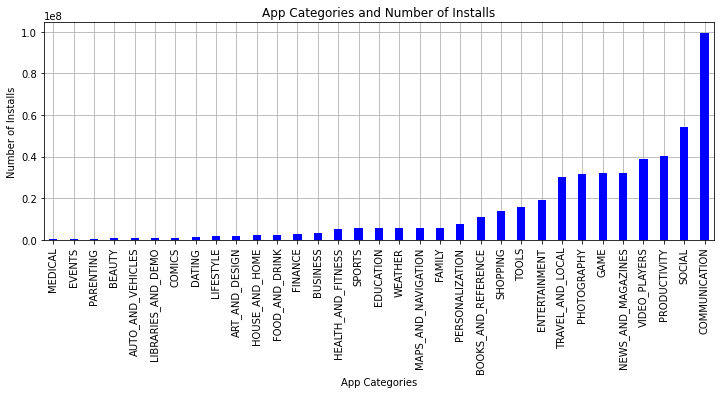

In [ ]:
a = df_play_store_group['Installs'].sort_values().plot(kind='bar',figsize=(12, 4),grid=True,facecolor='blue', zorder=2, width=0.4)
plt.xlabel("App Categories")
plt.ylabel("Number of Installs")
plt.title("App Categories and Number of Installs")
plt.show(a)

In [ ]:
df_play_store_group['Installs'].sort_values()[-3:]

Category
PRODUCTIVITY     4.038766e+07
SOCIAL           5.432371e+07
COMMUNICATION    9.953427e+07
Name: Installs, dtype: float64

So we can see that the categories which have highest number of installs are VIDEO_PLAYERS,SOCIAL,COMMUNICATION 

Creating a column of a new factor obtained from Ratings and Reviews called as performance factor

---


performance factor = (Rating)*(Number of Reviews)

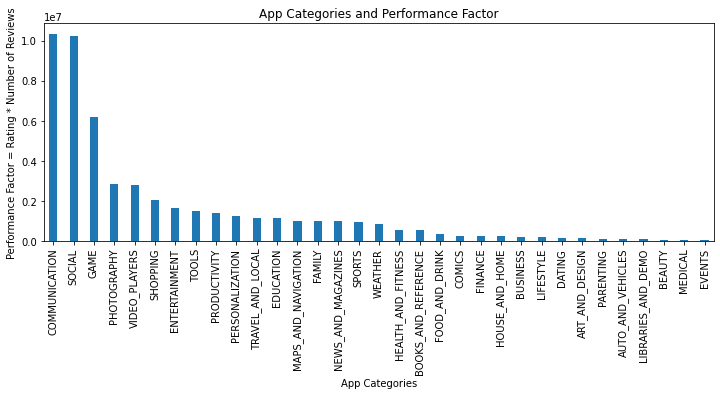

In [ ]:
df_play_store_group['performance_factor'] = (df_play_store_group['Rating'])*(df_play_store_group['Reviews'])
b = df_play_store_group['performance_factor'].sort_values(ascending=False).plot(kind='bar',figsize=(12, 4), zorder=2, width=0.4)
plt.xlabel("App Categories")
plt.ylabel("Performance Factor = Rating * Number of Reviews")
plt.title("App Categories and Performance Factor")
plt.show(b)

In [ ]:
df_play_store_group['performance_factor'].sort_values(ascending=False)[:3]

Category
SOCIAL           8.961878e+06
COMMUNICATION    8.762609e+06
GAME             5.940243e+06
Name: performance_factor, dtype: float64

So we can see that the categories which have highest performance in terms of Ratings and Number of Reviews are SOCIAL, COMMUNICATION and GAMES

Finally, on overall basis we can conclude that if a developer would like to create a successful app on the basis of higher number of installs, Ratings, and higher number of reviews, she should develop an app in one of the categories viz. SOCIAL and COMMUNICATION

Now Working with second DataFrame

In [ ]:
 df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


This data set contains user translated reviews. 


```
<\n
```

Sentiments are like boolean values of user translated reviews having values - 'positive','negetive' and 'neutral'.
Sentiment Polarity is the scale value of reviews that range from -1 to 1. Means for positive it would be in range 0 to 1. Like-wise for negetive it would be -1 to 0. And for neutral it will be 0.
For sentimennt subjectivity we can consider it as pitch of review. It measured on scale 0 to 1. Means if review words are too good it would be 1. Similarly if review words are too bad its value will be 1.
This data seems useful to replace or relate our 'Reviews' column in apps data set. Better to begin with this dataframe.

Almost Half of the values are null, better omit   them

In [ ]:
df_reviews.dropna(inplace=True)

In [ ]:
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


75% times sentiment polarity is 0.4 which is positive and median sentiment subjectivity is 0.51 

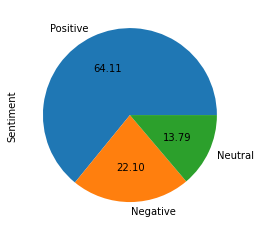

In [ ]:
df_reviews['Sentiment'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# Apps with more than or equal to 1 billion downloads
df_play_store[df_play_store['Installs'] >= 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [ ]:
df_play_store[df_play_store['Rating']>=4.5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326.0,21M,100000.0,Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632.0,5.5M,500000.0,Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,1000.0,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
len(df_play_store[df_play_store['Rating']>=4.5])

2955

checking apps with rating>=4.5 and installs> 1 billion

In [ ]:
df_ = df_play_store[(df_play_store['Rating']>=4.5) & (df_play_store['Installs'] >= 1.000000e+09)]

In [ ]:
df_.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
df_

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Subway Surfers,GAME,4.5,27722264.0,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1,Subway Surfers,GAME,4.5,27723193.0,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2,Subway Surfers,GAME,4.5,27724094.0,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3,Subway Surfers,GAME,4.5,27725352.0,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
4,Instagram,SOCIAL,4.5,66577313.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
5,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1.000000e+09,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556.0,Varies with device,1.000000e+09,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
7,Google Photos,PHOTOGRAPHY,4.5,10858538.0,Varies with device,1.000000e+09,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
8,Google Photos,PHOTOGRAPHY,4.5,10859051.0,Varies with device,1.000000e+09,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
9,Subway Surfers,GAME,4.5,27711703.0,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [ ]:
df_group = df_.groupby(by='Category').mean()
df_group

,Rating,Reviews,Installs
Category,,,
GAME,4.5,27721321.20,1.000000e+09
PHOTOGRAPHY,4.5,10855956.75,1.000000e+09
SOCIAL,4.5,66554892.00,1.000000e+09


In [ ]:
df_group = df_.groupby(by='App').mean()
df_group

,Rating,Reviews,Installs
App,,,
Google Photos,4.5,10855956.75,1.000000e+09
Instagram,4.5,66554892.00,1.000000e+09
Subway Surfers,4.5,27721321.20,1.000000e+09


So, If we consider that the Apps which have got Ratings more than 4.5  and more than 1 billion downloads are more successfull then the categories of Apps which we have got after our analysis are GAME,PHOTOGRAPHY and SOCIAL.
App names particularly are Subway Surfers, GOOGLE PHOTOS and INSTAGRAM in GAME,PHOTOGRAPHY and SOCIAL category respectively. 



In [ ]:
df_type = df_play_store.groupby('Type')
df_type.apply(print)

                                                     App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10039 rows x 1

""


In [ ]:

paid_apps = df_play_store[df_play_store['Type'] == 'Paid']
paid_apps.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,100000.0,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,100000.0,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
2,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,100000.0,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
3,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,100000.0,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
4,427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,Varies with device,100000.0,Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,10735,FP VoiceBot,FAMILY,NaN,17.0,157k,100.0,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
796,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,1000.0,Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
797,10782,Trine 2: Complete Story,GAME,3.8,252.0,11M,10000.0,Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
798,10785,"sugar, sugar",FAMILY,4.2,1405.0,9.5M,10000.0,Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up
